# 为什么引入Numpy

标准安装的Python中用列表(list)保存一组值，可以用来当作数组使用，不过由于列表的元素可以是任何对象，因此**列表中所保存的是对象的指针**。这样为了保存一个简单的[1,2,3]，需要有3个指针和三个整数对象。对于数值运算来说这种结构显然比较浪费内存和CPU计算时间。

此外Python还提供了一个[array](https://docs.python.org/3/library/array.html)模块，array对象和列表不同，它直接保存数值，和C语言的一维数组比较类似。但是由于它**不支持多维，也没有各种运算函数**，因此也不适合做数值运算。

NumPy的诞生弥补了这些不足，NumPy提供了两种基本的对象：
- `ndarray`（N-dimensional array object）,`ndarray`(下文统一称之为数组)是存储单一数据类型的多维数组
- `ufunc`（universal function object）,`ufunc`则是能够对数组进行处理的函数。

NDArray的常用功能与方法可以参考：https://www.numpy.org.cn/user/quickstart.html#%E5%8A%9F%E8%83%BD%E5%92%8C%E6%96%B9%E6%B3%95%E6%A6%82%E8%BF%B0

# 创建Ndarray对象


## 从`list`来创建

In [2]:
import numpy as np

a = np.array([1, 2, 3, 4], dtype='int32')
b = np.array((5, 6, 7, 8), dtype = 'int64')
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]], dtype = 'float32') # 创建二维数组

print(a)
print(b)
print(c)

[1 2 3 4]
[5 6 7 8]
[[ 1.  2.  3.  4.]
 [ 4.  5.  6.  7.]
 [ 7.  8.  9. 10.]]


## 使用范围函数来创建

上面的例子都是先创建一个Python序列，然后通过array函数将其转换为数组，这样做显然效率不高。因此NumPy提供了很多专门用来创建数组的函数。下面的每个函数都有一些关键字参数，具体用法请查看函数说明。

In [3]:
# arange函数类似于python的range函数，通过指定开始值、终值和步长来创建一维数组，注意数组不包括终值:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [4]:
# linspace函数通过指定开始值、终值和元素个数来创建一维数组
# 可以通过endpoint关键字指定是否包括终值，缺省设置是包括终值:
np.linspace(0, 1, 10, endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [5]:
# ogspace函数和linspace类似，不过它创建等比数列
# 下面的例子产生1(10^0)到100(10^2)、有20个元素的等比数列
np.logspace(0, 2, 20)

array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ])

## 创建特珠的Ndarray

In [6]:
a = np.zeros((2,2))
print(a)
b = np.ones((1,2))
print(b)
c = np.full((2,2), 7)
print(c)
d = np.eye(3)
print(d)
e = np.random.random((2,2))
print(e)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.87701904 0.68196487]
 [0.77832862 0.09621469]]


# 获取数组的属性

In [9]:
a = np.arange(0, 12).reshape(3,4)
print(a.ndim) #有多个维
print(a.shape) #每一维的大小
print(a.size) # 总元素的个数
print(a.dtype) # 数组类型
print(a.itemsize) # 元素所占的字节数
print(a.strides) # 每一維上进行数据访问的步长
print(a.data) # 内存数据指针

2
(3, 4)
12
int64
8
(32, 8)


## shape

array数组的大小可以通过其shape属性获得：

In [6]:
print(a.shape)
print(c.shape)

(4,)
(3, 4)


数组a的shape只有一个元素，因此它是一维数组,可以说它既是行向量又是列向量，它的转置等于它本身,它与shape=(4,1)的array是有区别的，stackoverflow上的[解释](http://stackoverflow.com/questions/15165170/how-do-i-maintain-row-column-orientation-of-vectors-in-numpy)。而数组c的shape有两个元素，因此它是二维数组，其中第0轴(行数)的长度为3，第1轴（列数）的长度为4。还可以通过修改数组的shape属性，在保持数组元素个数不变的情况下，改变数组每个轴的长度。下面的例子将数组c的shape改为(4,3)，注意从(3,4)改为(4,3)并不是对数组进行转置，而只是改变每个轴的大小，数组元素在**内存**中的位置并没有改变：

In [7]:
c.shape = 4,3
c

array([[  1.,   2.,   3.],
       [  4.,   4.,   5.],
       [  6.,   7.,   7.],
       [  8.,   9.,  10.]], dtype=float32)

当某个轴的元素为-1时，将根据数组元素的个数自动计算此轴的长度，因此下面的程序将数组c的shape改为了(2,6)：

In [9]:
c.shape = 2, -1
c

array([[  1.,   2.,   3.,   4.,   4.,   5.],
       [  6.,   7.,   7.,   8.,   9.,  10.]], dtype=float32)

使用数组的reshape方法，可以创建一个改变了尺寸的新数组，原数组的shape保持不变：

In [10]:
d = a.reshape((2,2))
d

array([[1, 2],
       [3, 4]], dtype=int32)

数组a和d其实共享数据存储内存区域，因此修改其中任意一个数组的元素都会同时修改另外一个数组的内容：

In [12]:
d[0][1] = 10
a

array([ 1, 10,  3,  4], dtype=int32)

除了reshape外，`ravel`和`.T`也都会改变数组的形状，并组返回一个新的数组。

In [11]:
a = np.floor(10 * np.random.random((3,4)))
print(a)
print(a.ravel())
print(a.T)

[[8. 5. 2. 4.]
 [1. 7. 2. 7.]
 [0. 9. 0. 0.]]
[8. 5. 2. 4. 1. 7. 2. 7. 0. 9. 0. 0.]
[[8. 1. 0.]
 [5. 7. 9.]
 [2. 2. 0.]
 [4. 7. 0.]]


# 存取元素

数组元素的存取方法和Python的标准方法相同：

In [14]:
a = np.arange(10)

In [15]:
#用整数作为下标可以获取数组中的某个元素
a[5]

5

In [16]:
a[3:5]  # 用范围作为下标获取数组的一个切片，包括a[3]不包括a[5]

array([3, 4])

In [17]:
a[:5]   # 省略开始下标，表示从a[0]开始

array([0, 1, 2, 3, 4])

In [18]:
a[:-1]  # 下标可以使用负数，表示从数组后往前

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [19]:
a[2:4] = 100,101    # 下标还可以用来修改元素的值
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [20]:
a[1:-1:2]   # 范围中的第三个参数表示步长，2表示隔一个元素取一个元素

array([  1, 101,   5,   7])

In [21]:
a[::-1] # 省略范围的开始下标和结束下标，步长为-1，整个数组头尾颠倒

array([  9,   8,   7,   6,   5,   4, 101, 100,   1,   0])

In [22]:
a[5:1:-2] # 步长为负数时，开始下标必须大于结束下标

array([  5, 101])

**和Python的列表序列不同，通过下标范围获取的新的数组是原始数组的一个视图。它与原始数组共享同一块数据空间：**

In [25]:
a = list(range(10))
b = a[2:5]
b[2] = 42
a,b

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 3, 42])

In [26]:
a = np.arange(10)
b = a[2:5]
b[2] = 42
a,b

(array([ 0,  1,  2,  3, 42,  5,  6,  7,  8,  9]), array([ 2,  3, 42]))

除了使用下标范围存取元素之外，NumPy还提供了两种存取元素的高级方法。

## 使用整数序列

当使用整数序列对数组元素进行存取时，将使用整数序列中的每个元素作为下标，整数序列可以是列表或者数组。**使用整数序列作为下标获得的数组不和原始数组共享数据空间**。因为用整数序列来取子序列，一般是离散的，底层就没办法复用存储了。

In [28]:
x = np.arange(10,1,-1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [29]:
x[[3, 3, 1, 8]] # 获取x中的下标为3, 3, 1, 8的4个元素，组成一个新的数组

array([7, 7, 9, 2])

In [31]:
b = x[np.array([3,3,-3,8])]  #下标可以是负数，序列可以是list也可以是ndarray
b

array([7, 7, 4, 2])

In [32]:
b[2] = 100
b,a # 由于b和x不共享数据空间，因此x中的值并没有改变

(array([  7,   7, 100,   2]), array([ 0,  1,  2,  3, 42,  5,  6,  7,  8,  9]))

## 使用布尔数组

当使用布尔数组b作为下标存取数组x中的元素时，将收集数组x中所有在数组b中对应下标为True的元素。使用布尔数组作为下标获得的数组不和原始数组共享数据空间，**注意这种方式只对应于布尔数组，不能使用布尔列表**。

In [37]:
x = np.random.rand(10) # 产生一个长度为10，元素值为0-1的随机数的数组
x

array([ 0.25606347,  0.28591168,  0.38167538,  0.89394466,  0.03180174,
        0.66083711,  0.0661651 ,  0.58585513,  0.79111047,  0.29161313])

In [38]:
selected = x > 0.5
selected

array([False, False, False,  True, False,  True, False,  True,  True, False], dtype=bool)

In [39]:
# 使用x>0.5返回的布尔数组收集x中的元素，因此得到的结果是x中所有大于0.5的元素的数组
x[selected]

array([ 0.89394466,  0.66083711,  0.58585513,  0.79111047])

# 将不同数组堆叠在一起

In [19]:
a = np.floor(10 * np.random.random((2,2)))
b = np.floor(10 * np.random.random((2,2)))
print('a: \n', a)
print('b: \n', b)
print('vstack: \n', np.vstack((a,b)))
print('hstack: \n', np.hstack((a, b)))

a: 
 [[1. 7.]
 [4. 7.]]
b: 
 [[6. 3.]
 [4. 5.]]
vstack: 
 [[1. 7.]
 [4. 7.]
 [6. 3.]
 [4. 5.]]
hstack: 
 [[1. 7. 6. 3.]
 [4. 7. 4. 5.]]


# 将一个数组拆分为几个较小的数组

In [25]:
a = np.floor(10 * np.random.random((2,12)))
print('a = \n', a)
print(np.hsplit(a, 3))
print(np.hsplit(a, (3,4))) # 分别从第3和第4列的地方断裂

a = 
 [[8. 3. 4. 8. 1. 5. 7. 1. 3. 4. 7. 6.]
 [6. 2. 6. 1. 5. 1. 5. 3. 2. 1. 1. 4.]]
[array([[8., 3., 4., 8.],
       [6., 2., 6., 1.]]), array([[1., 5., 7., 1.],
       [5., 1., 5., 3.]]), array([[3., 4., 7., 6.],
       [2., 1., 1., 4.]])]
[array([[8., 3., 4.],
       [6., 2., 6.]]), array([[8.],
       [1.]]), array([[1., 5., 7., 1., 3., 4., 7., 6.],
       [5., 1., 5., 3., 2., 1., 1., 4.]])]


vsplit可以沿垂直轴分割，并且array_split允许指定要分割的轴。

# 数组的计算

基本数学计算函数会对数组中元素逐个进行计算，既可以利用操作符重载，也可以使用函数方式：

In [56]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
print(np.sqrt(x))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


`*`是元素逐个相乘，而不是矩阵乘法。在Numpy中使用dot来进行矩阵乘法：

In [57]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy提供了很多计算数组的函数，其中最常用的一个是sum：

更多的ufunc，可以参考：[文档](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

In [59]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements;
print(np.sum(x, axis=0))  # Compute sum of each column;
print(np.sum(x, axis=1))  # Compute sum of each row; 

10
[4 6]
[3 7]


除了计算，我们还常常改变数组或者操作其中的元素。其中将矩阵转置是常用的一个，在Numpy中，使用T来转置矩阵：

In [60]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)
print(v.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


# ndarray的内存结构

下面让我们来看看ndarray数组对象是如何在内存中储存的。如下图所示，关于数组的描述信息保存在一个数据结构中，这个结构引用两个对象：一块用于保存数据的存储区域和一个用于描述元素类型的dtype对象。

![](../images/numpy_memory_struct.png)

数据存储区域保存着数组中所有元素的二进制数据，dtype对象则知道如何将元素的二进制数据转换为可用的值。数组的维数、大小等信息都保存在ndarray数组对象的数据结构中。图中显示的是如下数组的内存结构：
```
>>> a = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32)
```
strides中保存的是当每个轴的下标增加1时，数据存储区中的指针所增加的字节数。例如图中的strides为12,4，即第0轴的下标增加1时，数据的地址增加12个字节：即a[1,0]的地址比a[0,0]的地址要高12个字节，正好是3个单精度浮点数的总字节数；第1轴下标增加1时，数据的地址增加4个字节，正好是单精度浮点数的字节数。

如果strides中的数值正好和对应轴所占据的字节数相同的话，那么数据在内存中是连续存储的。然而数据并不一定都是连续储存的，前面介绍过通过下标范围得到新的数组是原始数组的视图，即它和原始视图共享数据存储区域：
```
>>> b = a[::2,::2]
>>> b
array([[ 0.,  2.],
       [ 6.,  8.]], dtype=float32)
>>> b.strides
(24, 8)
```

由于数组b和数组a共享数据存储区，而b中的第0轴和第1轴都是数组a中隔一个元素取一个，因此数组b的strides变成了24,8，正好都是数组a的两倍。 对照前面的图很容易看出数据0和2的地址相差8个字节，而0和6的地址相差24个字节。

元素在数据存储区中的排列格式有两种：C语言格式和Fortan语言格式。在C语言中，多维数组的第0轴是最上位的，即第0轴的下标增加1时，元素的地址增加的字节数最多；而Fortan语言的多维数组的第0轴是最下位的，即第0轴的下标增加1时，地址只增加一个元素的字节数。在NumPy中，元素在内存中的排列缺省是以C语言格式存储的，如果你希望改为Fortan格式的话，只需要给数组传递order="F"参数：

```
>>> c = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32, order="F")
>>> c.strides
(4, 12)
```

# 引用、视图/浅拷贝、深拷贝

In [43]:
# 引用
a = np.arange(12)
b = a
print(b is a)

# Python中可变对象在函数传递也是以引用的方式
def f(x):
    print(id(x))

print(id(a))
f(a)

True
140587970488480
140587970488480


In [44]:
# 视图/浅拷贝
c = a.view()
print(c is a)
print(c.base is a)
print(c.flags.owndata)
# 切片返回的就是视图或浅拷贝
s = a[3:6]
print(s is a)
print(s.base is a)
print(s.flags.owndata)

False
True
False
False
True
False


In [45]:
# 深拷贝
d = a.copy()
print(d is a)
print(d.base is a)
print(d.flags.owndata)
# 删除a后，d的数组依然可以正常使用
del a
print(d)

False
False
True
[ 0  1  2  3  4  5  6  7  8  9 10 11]


# Broadcast

当我们使用ufunc函数对两个数组进行计算时，ufunc函数会对这两个数组的对应元素进行计算，因此它要求这两个数组有相同的大小(shape相同)。如果两个数组的shape不同的话，会进行如下的广播(broadcasting)处理：

1. 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐。
2. 输出数组的shape是输入数组shape的各个轴上的最大值。
3. 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错。
4. 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值。

上述4条规则理解起来可能比较费劲，让我们来看一个实际的例子。

先创建一个二维数组a，其shape为(6,1)：

In [41]:
a = np.arange(0, 60, 10).reshape(-1,1)
a.shape

(6, 1)

In [42]:
b = np.arange(0,5)
b.shape

(5,)

计算a和b的和，得到一个加法表，它相当于计算a,b中所有元素组的和，得到一个shape为(6,5)的数组：

In [43]:
c = a + b
c

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

由于a和b的shape长度(也就是ndim属性)不同，根据规则1，需要让b的shape向a对齐，于是将b的shape前面加1，补齐为(1,5)。相当于做了如下计算：

In [44]:
b.shape = 1,5
b

array([[0, 1, 2, 3, 4]])

这样加法运算的两个输入数组的shape分别为(6,1)和(1,5)，根据规则2，输出数组的各个轴的长度为输入数组各个轴上的长度的最大值，可知输出数组的shape为(6,5)。

由于b的第0轴上的长度为1，而a的第0轴上的长度为6，因此为了让它们在第0轴上能够相加，需要将b在第0轴上的长度扩展为6，这相当于：

In [45]:
b = b.repeat(6, axis=0)
b

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

由于a的第1轴的长度为1，而b的第一轴长度为5，因此为了让它们在第1轴上能够相加，需要将a在第1轴上的长度扩展为5，这相当于：

In [46]:
a = a.repeat(5, axis=1)
a

array([[ 0,  0,  0,  0,  0],
       [10, 10, 10, 10, 10],
       [20, 20, 20, 20, 20],
       [30, 30, 30, 30, 30],
       [40, 40, 40, 40, 40],
       [50, 50, 50, 50, 50]])

经过上述处理之后，a和b就可以按对应元素进行相加运算了。

当然，numpy在执行a+b运算时，其内部并不会真正将长度为1的轴用repeat函数进行扩展，如果这样做的话就太浪费空间了。

由于这种广播计算很常用，因此numpy提供了一个快速产生如上面a,b数组的方法： ogrid对象：

In [48]:
x, y = np.ogrid[0:5, 0:5]

In [49]:
x

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [50]:
y

array([[0, 1, 2, 3, 4]])

ogrid是一个很有趣的对象，它像一个多维数组一样，用切片组元作为下标进行存取，返回的是一组可以用来广播计算的数组。其切片下标有两种形式：

开始值:结束值:步长，和np.arange(开始值, 结束值, 步长)类似

开始值:结束值:长度j，当第三个参数为虚数时，它表示返回的数组的长度，和np.linspace(开始值, 结束值, 长度)类似：

In [52]:
x, y = np.ogrid[0:1:4j, 0:1:3j]
print('x = ', x)
print('y = ', y)

x =  [[ 0.        ]
 [ 0.33333333]
 [ 0.66666667]
 [ 1.        ]]
y =  [[ 0.   0.5  1. ]]


**ogrid为什么不是函数?**

根据Python的语法，只有在中括号中才能使用用冒号隔开的切片语法，如果ogrid是函数的话，那么这些切片必须使用slice函数创建，这显然会增加代码的长度。

利用ogrid的返回值，我能很容易计算x, y网格面上各点的值，或者x, y, z网格体上各点的值。下面是绘制二维高斯分布的程序：

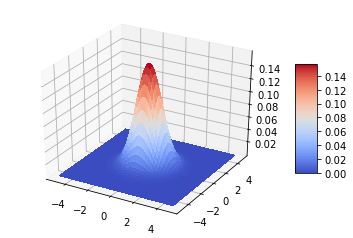

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
sigma = 1.0
x,y = np.ogrid[-5:5:0.1, -5:5:0.1]

z = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()